<a href="https://colab.research.google.com/github/ahzaidy/Programs/blob/main/CPSC_5410_HW1_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-ef98e81cc448>:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('https://raw.githubusercontent.com/ahzaidy/Programs/refs/heads/main/LibSVM-space_ga_scale.txt', delim_whitespace=True, header=None)


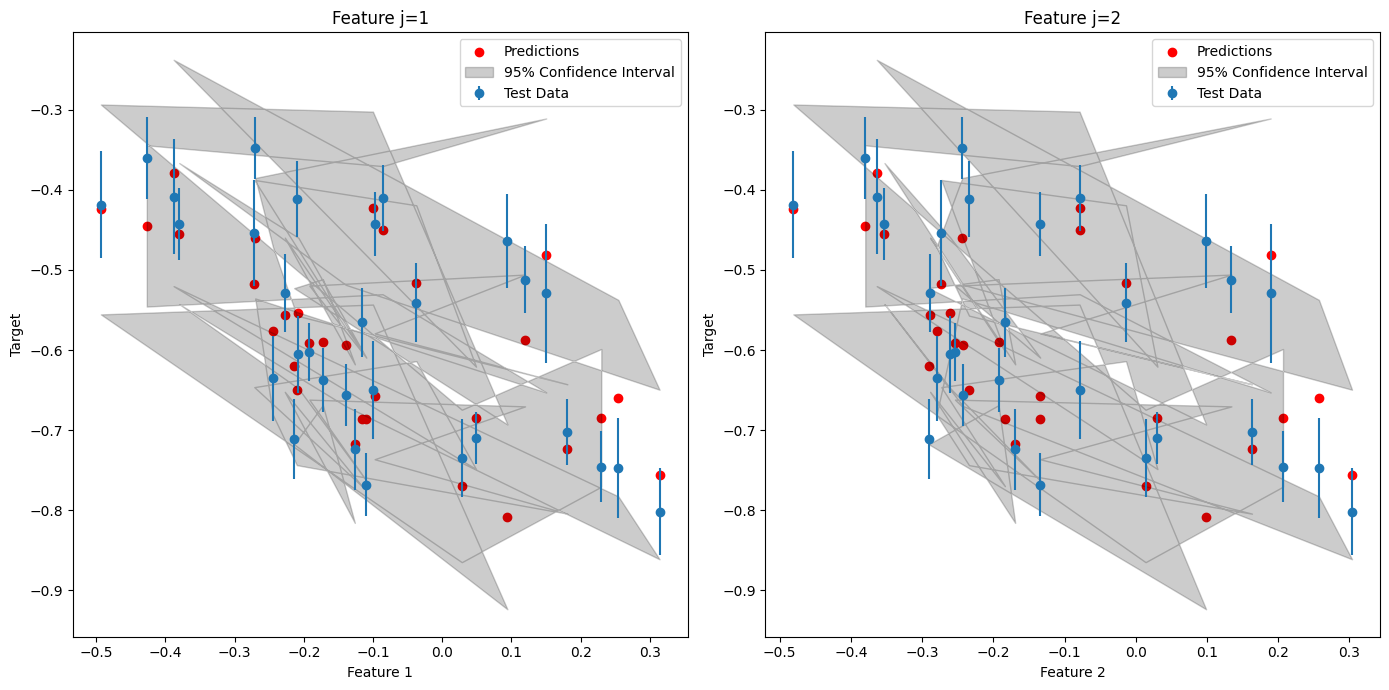

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the dataset from file
df = pd.read_csv('https://raw.githubusercontent.com/ahzaidy/Programs/refs/heads/main/LibSVM-space_ga_scale.txt', delim_whitespace=True, header=None)

# Separate target and features
y = df.iloc[:, 0]    # First column as the target
X = df.iloc[:, 1:]   # All other columns as features

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=150, test_size=30, random_state=42)

# Define the kernel: ConstantKernel * RBF
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))

# Create and train the Gaussian Process Regressor
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1)
gpr.fit(X_train, y_train)

# Make predictions
y_pred, sigma = gpr.predict(X_test, return_std=True)

# Convert predictions to DataFrame for easy handling
test_results = pd.DataFrame({
    'Feature_1': X_test.iloc[:, 0],
    'Feature_2': X_test.iloc[:, 1],
    'True_Values': y_test,
    'Predicted_Values': y_pred,
    'Sigma': sigma
})

# Plot the results for features j=1 and j=2
plt.figure(figsize=(14, 7))

# Feature j=1
plt.subplot(1, 2, 1)
plt.errorbar(test_results['Feature_1'], test_results['True_Values'], yerr=test_results['Sigma'], fmt='o', label='Test Data')
plt.scatter(test_results['Feature_1'], test_results['Predicted_Values'], color='r', label='Predictions')
plt.fill_between(test_results['Feature_1'], test_results['Predicted_Values'] - 1.96 * test_results['Sigma'],
                 test_results['Predicted_Values'] + 1.96 * test_results['Sigma'], alpha=0.2, color='k', label='95% Confidence Interval')
plt.title('Feature j=1')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.legend()

# Feature j=2
plt.subplot(1, 2, 2)
plt.errorbar(test_results['Feature_2'], test_results['True_Values'], yerr=test_results['Sigma'], fmt='o', label='Test Data')
plt.scatter(test_results['Feature_2'], test_results['Predicted_Values'], color='r', label='Predictions')
plt.fill_between(test_results['Feature_2'], test_results['Predicted_Values'] - 1.96 * test_results['Sigma'],
                 test_results['Predicted_Values'] + 1.96 * test_results['Sigma'], alpha=0.2, color='k', label='95% Confidence Interval')
plt.title('Feature j=2')
plt.xlabel('Feature 2')
plt.ylabel('Target')
plt.legend()

plt.tight_layout()
plt.show()